In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Define Hyperparameters
latent_dim = 100
num_classes = 10
batch_size = 128
learning_rate = 0.0002
epochs = 50
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# Load MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

dataset = torchvision.datasets.MNIST(root="./data", train=True, transform=transform, download=True)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 17.4MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 476kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.35MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.73MB/s]


In [ ]:
print(f"Total rows in the dataset: {len(dataloader)}")

Total rows in the dataset: 469


In [ ]:
# Vanilla GAN Generator Model
class VanillaGenerator(nn.Module):
    def __init__(self, latent_dim):
        super(VanillaGenerator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 28*28),
            nn.Tanh()
        )

    def forward(self, z):
        out = self.model(z)
        return out.view(-1, 1, 28, 28)

# Vanilla GAN Discriminator Model
class VanillaDiscriminator(nn.Module):
    def __init__(self):
        super(VanillaDiscriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(28*28, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = x.view(-1, 28*28)
        return self.model(x)

In [ ]:
# Initialize models
vanilla_generator = VanillaGenerator(latent_dim).to(device)
vanilla_discriminator = VanillaDiscriminator().to(device)

# Define Loss and Optimizers
criterion = nn.BCELoss()
optimizer_G_vanilla = optim.Adam(vanilla_generator.parameters(), lr=learning_rate, betas=(0.5, 0.999))
optimizer_D_vanilla = optim.Adam(vanilla_discriminator.parameters(), lr=learning_rate, betas=(0.5, 0.999))

Vanilla GAN Epoch [1/50], D Loss: 0.4759, G Loss: 3.3715
Vanilla GAN Epoch [2/50], D Loss: 0.2469, G Loss: 4.8879
Vanilla GAN Epoch [3/50], D Loss: 0.3010, G Loss: 2.7228
Vanilla GAN Epoch [4/50], D Loss: 0.3652, G Loss: 2.3716
Vanilla GAN Epoch [5/50], D Loss: 0.2653, G Loss: 2.4830
Vanilla GAN Epoch [6/50], D Loss: 0.4752, G Loss: 2.7789
Vanilla GAN Epoch [7/50], D Loss: 0.6151, G Loss: 1.4998
Vanilla GAN Epoch [8/50], D Loss: 0.4099, G Loss: 2.1205
Vanilla GAN Epoch [9/50], D Loss: 0.5401, G Loss: 1.5583
Vanilla GAN Epoch [10/50], D Loss: 0.7573, G Loss: 2.3417


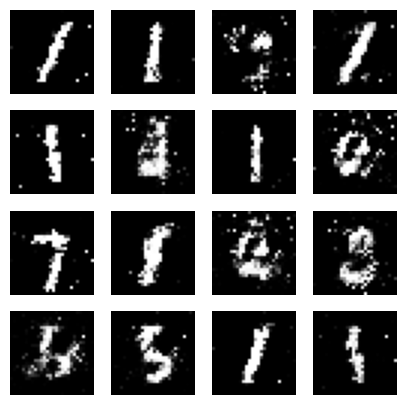

Vanilla GAN Epoch [11/50], D Loss: 0.8772, G Loss: 3.0373
Vanilla GAN Epoch [12/50], D Loss: 0.6262, G Loss: 1.5783
Vanilla GAN Epoch [13/50], D Loss: 0.7934, G Loss: 1.9528
Vanilla GAN Epoch [14/50], D Loss: 0.9709, G Loss: 1.4182
Vanilla GAN Epoch [15/50], D Loss: 0.7254, G Loss: 2.6288
Vanilla GAN Epoch [16/50], D Loss: 0.9539, G Loss: 2.9307
Vanilla GAN Epoch [17/50], D Loss: 0.7632, G Loss: 2.1648
Vanilla GAN Epoch [18/50], D Loss: 0.7786, G Loss: 1.8485
Vanilla GAN Epoch [19/50], D Loss: 0.6496, G Loss: 1.7625
Vanilla GAN Epoch [20/50], D Loss: 0.8334, G Loss: 2.0311


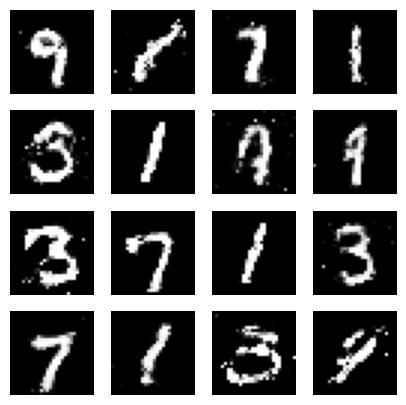

Vanilla GAN Epoch [21/50], D Loss: 0.8728, G Loss: 2.3468
Vanilla GAN Epoch [22/50], D Loss: 0.8630, G Loss: 1.4691
Vanilla GAN Epoch [23/50], D Loss: 0.6795, G Loss: 1.7831
Vanilla GAN Epoch [24/50], D Loss: 0.7568, G Loss: 1.7218
Vanilla GAN Epoch [25/50], D Loss: 0.9008, G Loss: 1.7686
Vanilla GAN Epoch [26/50], D Loss: 0.8070, G Loss: 1.8199
Vanilla GAN Epoch [27/50], D Loss: 0.8022, G Loss: 1.9085
Vanilla GAN Epoch [28/50], D Loss: 0.8674, G Loss: 1.3268
Vanilla GAN Epoch [29/50], D Loss: 0.7336, G Loss: 2.0088
Vanilla GAN Epoch [30/50], D Loss: 0.7543, G Loss: 1.9120


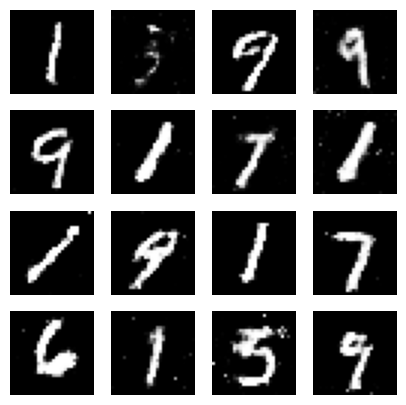

Vanilla GAN Epoch [31/50], D Loss: 0.7674, G Loss: 2.1385
Vanilla GAN Epoch [32/50], D Loss: 0.7921, G Loss: 1.7019
Vanilla GAN Epoch [33/50], D Loss: 0.7775, G Loss: 1.4867
Vanilla GAN Epoch [34/50], D Loss: 0.9282, G Loss: 2.1312
Vanilla GAN Epoch [35/50], D Loss: 0.7121, G Loss: 1.4998
Vanilla GAN Epoch [36/50], D Loss: 0.8591, G Loss: 1.4943
Vanilla GAN Epoch [37/50], D Loss: 0.8854, G Loss: 1.6689
Vanilla GAN Epoch [38/50], D Loss: 0.7797, G Loss: 1.6801
Vanilla GAN Epoch [39/50], D Loss: 0.8207, G Loss: 1.1993
Vanilla GAN Epoch [40/50], D Loss: 0.7828, G Loss: 1.9134


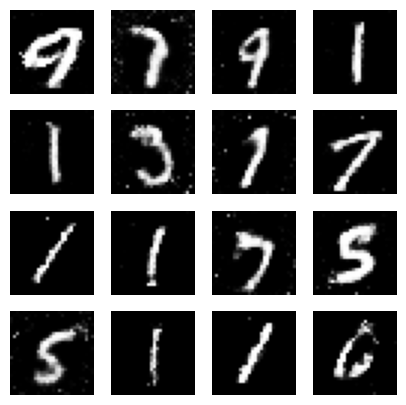

Vanilla GAN Epoch [41/50], D Loss: 0.9655, G Loss: 2.3217
Vanilla GAN Epoch [42/50], D Loss: 0.7188, G Loss: 1.9611
Vanilla GAN Epoch [43/50], D Loss: 0.7252, G Loss: 1.9227
Vanilla GAN Epoch [44/50], D Loss: 0.6409, G Loss: 2.0688
Vanilla GAN Epoch [45/50], D Loss: 0.7347, G Loss: 1.4194
Vanilla GAN Epoch [46/50], D Loss: 0.8900, G Loss: 2.1691
Vanilla GAN Epoch [47/50], D Loss: 0.6571, G Loss: 2.0862
Vanilla GAN Epoch [48/50], D Loss: 0.9083, G Loss: 2.0609
Vanilla GAN Epoch [49/50], D Loss: 0.8392, G Loss: 1.7111
Vanilla GAN Epoch [50/50], D Loss: 0.8683, G Loss: 2.1790


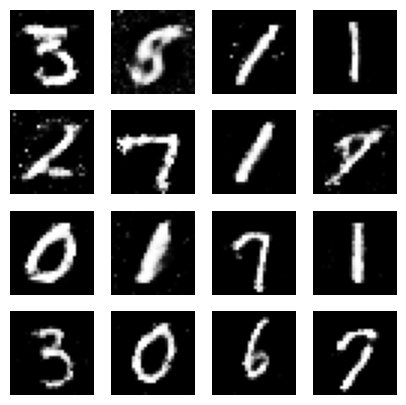

In [ ]:
for epoch in range(epochs):
    for i, (real_images, _) in enumerate(dataloader):
        real_images = real_images.to(device)
        batch_size = real_images.size(0)

        # Train Discriminator
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        outputs = vanilla_discriminator(real_images)
        d_loss_real = criterion(outputs, real_labels)

        z = torch.randn(batch_size, latent_dim).to(device)
        fake_images = vanilla_generator(z)
        outputs = vanilla_discriminator(fake_images.detach())
        d_loss_fake = criterion(outputs, fake_labels)

        d_loss = d_loss_real + d_loss_fake
        optimizer_D_vanilla.zero_grad()
        d_loss.backward()
        optimizer_D_vanilla.step()

        # Train Generator
        outputs = vanilla_discriminator(fake_images)
        g_loss = criterion(outputs, real_labels)

        optimizer_G_vanilla.zero_grad()
        g_loss.backward()
        optimizer_G_vanilla.step()

    print(f"Vanilla GAN Epoch [{epoch+1}/{epochs}], D Loss: {d_loss.item():.4f}, G Loss: {g_loss.item():.4f}")

    if (epoch + 1) % 10 == 0:
        with torch.no_grad():
            test_z = torch.randn(16, latent_dim).to(device)
            generated_images = vanilla_generator(test_z).cpu()
            fig, axes = plt.subplots(4, 4, figsize=(5, 5))
            for ax, img in zip(axes.flatten(), generated_images):
                ax.imshow(img.squeeze(), cmap='gray')
                ax.axis('off')
            plt.show()

# Save Vanilla GAN model
torch.save(vanilla_generator.state_dict(), "generator_vanilla.pth")

In [ ]:
# Conditional GAN Generator Model
class ConditionalGenerator(nn.Module):
    def __init__(self, latent_dim, num_classes):
        super(ConditionalGenerator, self).__init__()
        self.label_embedding = nn.Embedding(num_classes, num_classes)
        self.model = nn.Sequential(
            nn.Linear(latent_dim + num_classes, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 28*28),
            nn.Tanh()
        )

    def forward(self, z, labels):
        label_input = self.label_embedding(labels)
        gen_input = torch.cat((z, label_input), dim=1)
        out = self.model(gen_input)
        return out.view(-1, 1, 28, 28)

# Conditional GAN Discriminator Model
class ConditionalDiscriminator(nn.Module):
    def __init__(self, num_classes):
        super(ConditionalDiscriminator, self).__init__()
        self.label_embedding = nn.Embedding(num_classes, num_classes)
        self.model = nn.Sequential(
            nn.Linear(28*28 + num_classes, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x, labels):
        x = x.view(-1, 28*28)
        label_input = self.label_embedding(labels)
        disc_input = torch.cat((x, label_input), dim=1)
        return self.model(disc_input)

In [ ]:
# Conditional GAN Training
cgan_generator = ConditionalGenerator(latent_dim, num_classes).to(device)
cgan_discriminator = ConditionalDiscriminator(num_classes).to(device)

optimizer_G_cgan = optim.Adam(cgan_generator.parameters(), lr=learning_rate, betas=(0.5, 0.999))
optimizer_D_cgan = optim.Adam(cgan_discriminator.parameters(), lr=learning_rate, betas=(0.5, 0.999))


Conditional GAN Epoch [1/50], D Loss: 0.2347, G Loss: 3.2279
Conditional GAN Epoch [2/50], D Loss: 1.2291, G Loss: 6.6465
Conditional GAN Epoch [3/50], D Loss: 0.4207, G Loss: 1.8320
Conditional GAN Epoch [4/50], D Loss: 0.1381, G Loss: 3.2606
Conditional GAN Epoch [5/50], D Loss: 0.0781, G Loss: 3.5387
Conditional GAN Epoch [6/50], D Loss: 0.4290, G Loss: 1.7246
Conditional GAN Epoch [7/50], D Loss: 0.4994, G Loss: 2.4936
Conditional GAN Epoch [8/50], D Loss: 0.6910, G Loss: 1.7926
Conditional GAN Epoch [9/50], D Loss: 0.6115, G Loss: 2.3345
Conditional GAN Epoch [10/50], D Loss: 0.9051, G Loss: 1.6817


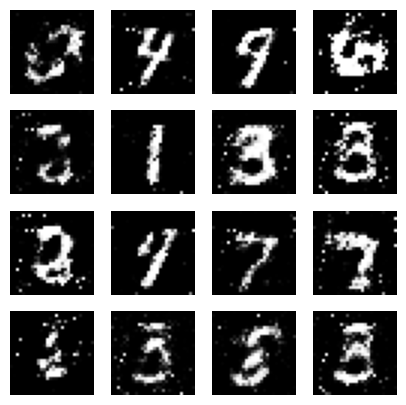

Conditional GAN Epoch [11/50], D Loss: 0.7379, G Loss: 1.9651
Conditional GAN Epoch [12/50], D Loss: 1.2256, G Loss: 1.0423
Conditional GAN Epoch [13/50], D Loss: 1.1111, G Loss: 1.8013
Conditional GAN Epoch [14/50], D Loss: 0.9719, G Loss: 1.5046
Conditional GAN Epoch [15/50], D Loss: 0.9090, G Loss: 1.2202
Conditional GAN Epoch [16/50], D Loss: 0.9205, G Loss: 1.6089
Conditional GAN Epoch [17/50], D Loss: 1.0701, G Loss: 1.8031
Conditional GAN Epoch [18/50], D Loss: 0.9884, G Loss: 1.1741
Conditional GAN Epoch [19/50], D Loss: 1.1379, G Loss: 1.8681
Conditional GAN Epoch [20/50], D Loss: 1.0561, G Loss: 1.2173


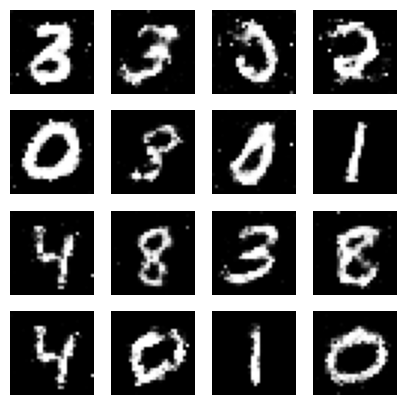

Conditional GAN Epoch [21/50], D Loss: 0.9717, G Loss: 1.5623
Conditional GAN Epoch [22/50], D Loss: 0.9829, G Loss: 1.4404
Conditional GAN Epoch [23/50], D Loss: 1.0931, G Loss: 1.2413
Conditional GAN Epoch [24/50], D Loss: 1.1169, G Loss: 0.9649
Conditional GAN Epoch [25/50], D Loss: 1.1043, G Loss: 0.9828
Conditional GAN Epoch [26/50], D Loss: 1.1454, G Loss: 0.9790
Conditional GAN Epoch [27/50], D Loss: 1.2996, G Loss: 0.9117
Conditional GAN Epoch [28/50], D Loss: 1.1817, G Loss: 1.6460
Conditional GAN Epoch [29/50], D Loss: 1.0713, G Loss: 1.3381
Conditional GAN Epoch [30/50], D Loss: 1.2107, G Loss: 1.2439


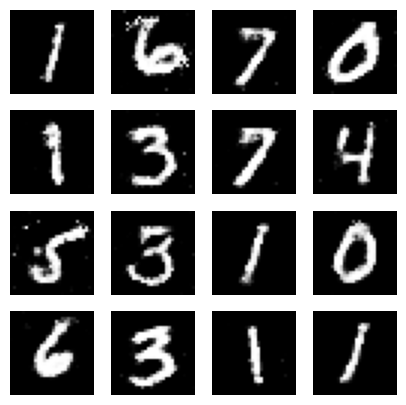

Conditional GAN Epoch [31/50], D Loss: 1.1471, G Loss: 0.9661
Conditional GAN Epoch [32/50], D Loss: 1.0930, G Loss: 1.2603
Conditional GAN Epoch [33/50], D Loss: 1.2321, G Loss: 1.5718
Conditional GAN Epoch [34/50], D Loss: 1.1383, G Loss: 1.0521
Conditional GAN Epoch [35/50], D Loss: 1.2441, G Loss: 1.2514
Conditional GAN Epoch [36/50], D Loss: 1.1868, G Loss: 1.0284
Conditional GAN Epoch [37/50], D Loss: 1.2052, G Loss: 0.8391
Conditional GAN Epoch [38/50], D Loss: 1.1484, G Loss: 1.2277
Conditional GAN Epoch [39/50], D Loss: 1.2434, G Loss: 1.7289
Conditional GAN Epoch [40/50], D Loss: 1.2154, G Loss: 1.0510


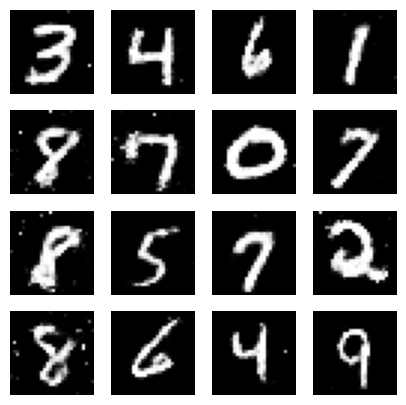

Conditional GAN Epoch [41/50], D Loss: 1.0282, G Loss: 1.2985
Conditional GAN Epoch [42/50], D Loss: 1.1877, G Loss: 1.0553
Conditional GAN Epoch [43/50], D Loss: 1.2455, G Loss: 1.5451
Conditional GAN Epoch [44/50], D Loss: 1.1856, G Loss: 1.6760
Conditional GAN Epoch [45/50], D Loss: 1.0901, G Loss: 1.1188
Conditional GAN Epoch [46/50], D Loss: 1.0918, G Loss: 1.1197
Conditional GAN Epoch [47/50], D Loss: 1.2289, G Loss: 1.1708
Conditional GAN Epoch [48/50], D Loss: 1.0677, G Loss: 1.1673
Conditional GAN Epoch [49/50], D Loss: 1.2000, G Loss: 1.0949
Conditional GAN Epoch [50/50], D Loss: 1.1005, G Loss: 1.3220


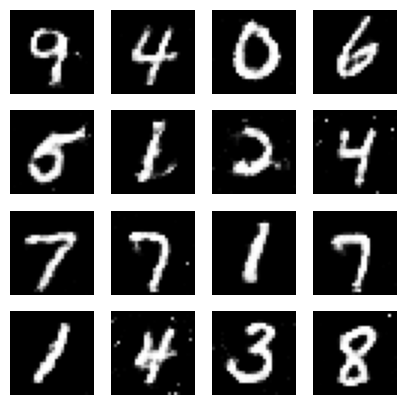

In [ ]:
for epoch in range(epochs):
    for i, (real_images, labels) in enumerate(dataloader):
        real_images, labels = real_images.to(device), labels.to(device)
        batch_size = real_images.size(0)

        # Train Discriminator
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        outputs = cgan_discriminator(real_images, labels)
        d_loss_real = criterion(outputs, real_labels)

        z = torch.randn(batch_size, latent_dim).to(device)
        gen_labels = torch.randint(0, num_classes, (batch_size,)).to(device)
        fake_images = cgan_generator(z, gen_labels)
        outputs = cgan_discriminator(fake_images.detach(), gen_labels)
        d_loss_fake = criterion(outputs, fake_labels)

        d_loss = d_loss_real + d_loss_fake
        optimizer_D_cgan.zero_grad()
        d_loss.backward()
        optimizer_D_cgan.step()

        # Train Generator
        outputs = cgan_discriminator(fake_images, gen_labels)
        g_loss = criterion(outputs, real_labels)

        optimizer_G_cgan.zero_grad()
        g_loss.backward()
        optimizer_G_cgan.step()

    print(f"Conditional GAN Epoch [{epoch+1}/{epochs}], D Loss: {d_loss.item():.4f}, G Loss: {g_loss.item():.4f}")

    if (epoch + 1) % 10 == 0:
        with torch.no_grad():
            test_z = torch.randn(16, latent_dim).to(device)
            test_labels = torch.randint(0, num_classes, (16,)).to(device)
            generated_images = cgan_generator(test_z, test_labels).cpu()
            fig, axes = plt.subplots(4, 4, figsize=(5, 5))
            for ax, img in zip(axes.flatten(), generated_images):
                ax.imshow(img.squeeze(), cmap='gray')
                ax.axis('off')
            plt.show()

# Save Conditional GAN model
torch.save(cgan_generator.state_dict(), "generator_cgan.pth")

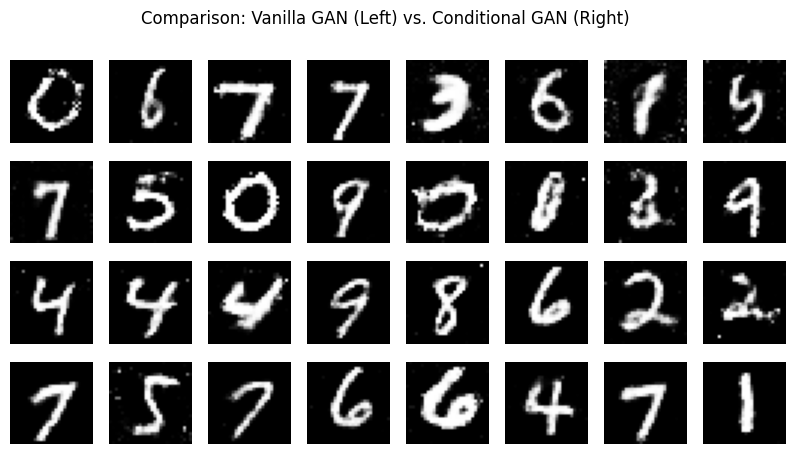

In [ ]:
# Load trained models
torch.load("generator_vanilla.pth")
torch.load("generator_cgan.pth")

# Generate images for comparison
def generate_images(generator, conditional=False):
    with torch.no_grad():
        z = torch.randn(16, latent_dim).to(device)
        if conditional:
            labels = torch.randint(0, num_classes, (16,)).to(device)
            images = generator(z, labels).cpu()
        else:
            images = generator(z).cpu()
        return images

# Plot comparison
def plot_comparison():
    vanilla_images = generate_images(vanilla_generator)
    cgan_images = generate_images(cgan_generator, conditional=True)

    fig, axes = plt.subplots(4, 8, figsize=(10, 5))
    for i, ax in enumerate(axes.flatten()):
        if i < 16:
            ax.imshow(vanilla_images[i].squeeze(), cmap='gray')
        else:
            ax.imshow(cgan_images[i-16].squeeze(), cmap='gray')
        ax.axis('off')
    plt.suptitle("Comparison: Vanilla GAN (Left) vs. Conditional GAN (Right)")
    plt.show()

plot_comparison()